<a href="https://www.kaggle.com/code/yahyasoker/calories-burnt-prediction-with-xgbregressor?scriptVersionId=127914617" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

1. [Load and Check Data](#1)
1. [Data Visualization](#2)
    * [Correlation](#3)
1. [Training the data](#4)
    * [XGBRegressor](#5)
    * [mean absolute error](#6)

   

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

<a id = "1"></a><br>
# Load and Check Data

In [2]:
df = pd.read_csv("/kaggle/input/fmendesdat263xdemos/calories.csv")
df.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [3]:
df_exercise = pd.read_csv("/kaggle/input/fmendesdat263xdemos/exercise.csv")

In [4]:
# merge 2 data into one
df = pd.concat([df_exercise, df['Calories']], axis=1)

In [5]:
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [6]:
df.shape

(15000, 9)

In [7]:
#looking for null values
df.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [8]:
# get some statistical measures about the data
df.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [9]:
sns.set()

<a id = "2"></a><br>
# Data Visualization

<AxesSubplot:xlabel='Gender', ylabel='count'>

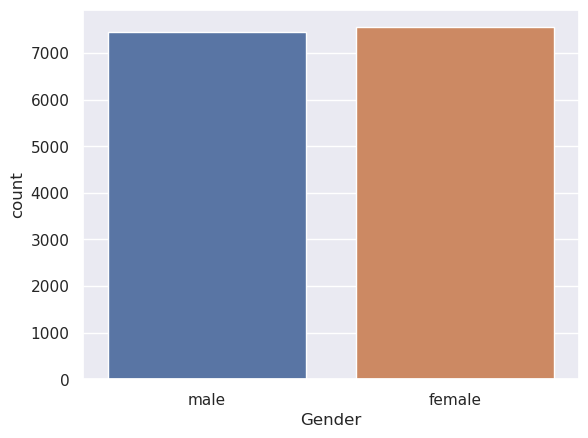

In [10]:
#Plotting gender column in count plot
sns.countplot(x='Gender',data=df)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


<AxesSubplot:xlabel='Age', ylabel='Density'>

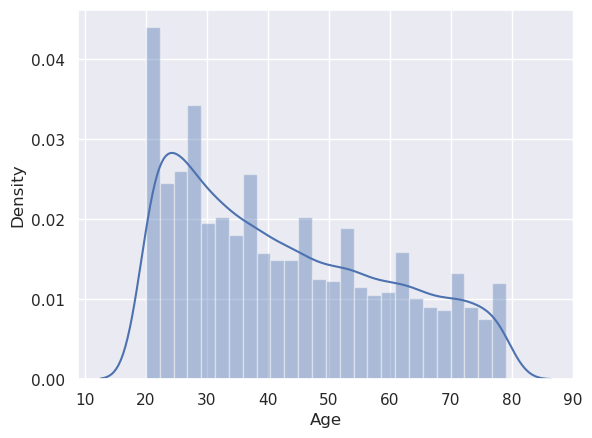

In [11]:
#finding the distribution of age value
sns.distplot(df['Age'] ) 

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


<AxesSubplot:xlabel='Height', ylabel='Density'>

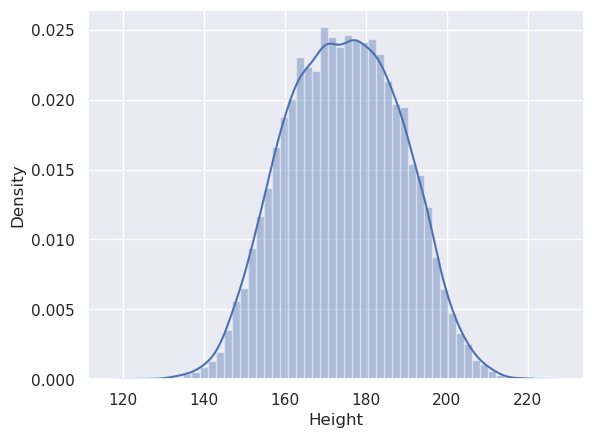

In [12]:
#Finding the distribution of height 
sns.distplot(df['Height']) 

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


<AxesSubplot:xlabel='Weight', ylabel='Density'>

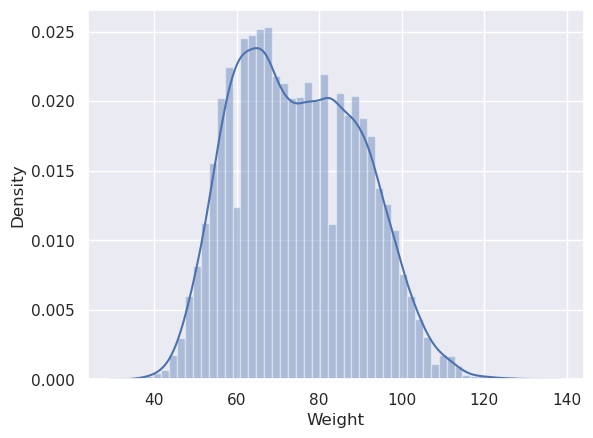

In [13]:
#Finding distribution of Weight data
sns.distplot(df['Weight'])

<a id = "3"></a><br>
## Correlation

In [14]:
corr=df.corr()

<AxesSubplot:>

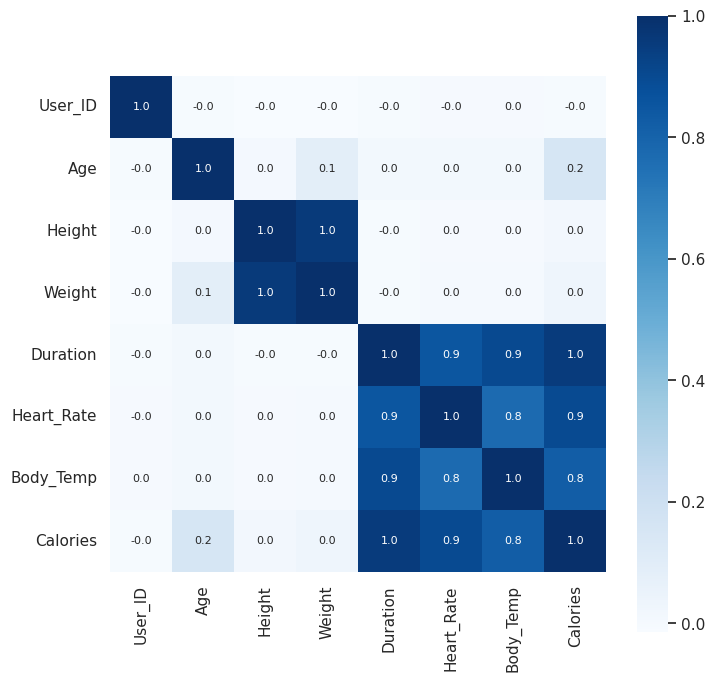

In [15]:
plt.figure(figsize=(8, 8))
sns.heatmap(corr, cbar=True, square=True, 
            fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues') 

In [16]:
#string to int for easier use
df.replace({"Gender":{"male" :0,"female":1}},inplace=True) 

In [17]:
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0


In [18]:
x=df.drop(columns=['User_ID', 'Calories'], axis=1)
y=df['Calories'] 

<a id = "4"></a><br>
# Training the data

In [19]:
x_train, x_test, y_train, y_test =train_test_split(x, y, train_size=0.2,random_state =42)

<a id = "5"></a><br>
### XGBRegressor

In [20]:
xgb = XGBRegressor() 

In [21]:
xgb.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [22]:
test_data_pred=xgb.predict(x_test)

<a id = "6"></a><br>
### mean absolute error

In [23]:
mae = metrics.mean_absolute_error(y_test, test_data_pred) 

In [24]:
print(f"Mean absolute error: {mae} ") 

Mean absolute error: 2.173345711933449 
